# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

90 classes:
['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


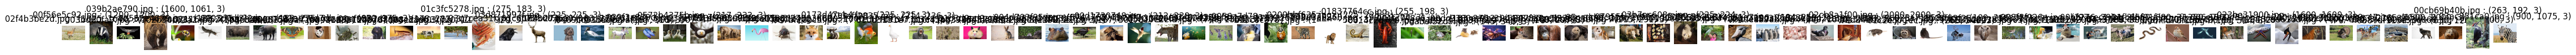

In [47]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# The images are in the data/shapes folder
# You need to change the data_path to match the location of your images
data_path = "animals/animals train"
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(64, 64))
i = 0
for sub_dir in os.listdir(data_path):
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path)
    img_shape = np.array(img).shape
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(img_shape))
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [48]:
#Your libraries here
# !pip install tensorflow
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import seaborn as sns 

from tensorflow import keras

from keras.utils import to_categorical 
from keras import layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator


### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [49]:
train_dir = "animals/animals train"
test_dir = "animals/animals test" 

train_datagen = ImageDataGenerator(width_shift_range=0.1,
                                   height_shift_range = 0.1, 
                                   horizontal_flip = True, 
                                   rescale=1./255,
                                   zoom_range=0.2)

test_datagen = ImageDataGenerator(rescale=1./255)


train_gen = train_datagen.flow_from_directory(directory= train_dir,
                                              target_size =(32,32),
                                              batch_size = 32,
                                              class_mode="categorical",
                                              subset="training")
                                              

test_gen = test_datagen.flow_from_directory(directory= test_dir,
                                              target_size =(32,32),
                                              batch_size = 32,
                                              class_mode="categorical"
                                              )


Found 5400 images belonging to 90 classes.
Found 5400 images belonging to 90 classes.


In [50]:
# Define the model as a sequence of layers
model = Sequential()
# Input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6),padding='same', activation='relu', input_shape=(32, 32, 3)))
# Add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(64, (6, 6),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add another convolution and max pooling layer
model.add(Conv2D(128, (6, 6),padding ='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
# Add a dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.5))
# Flatten the feature maps 
model.add(Flatten())
# Generate an output layer with a predicted probability for each class
model.add(Dense(90, activation='softmax')) #Should be 4 output classes not 10 
# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        3488      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         295040    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 128)        0

### Train the model
Train a CNN model with 10 epochs.

In [53]:
#Train Model 
history = model.fit(
    train_gen,
    steps_per_epoch=len(train_gen),
    epochs=100,
    validation_data=test_gen,
    validation_steps=len(test_gen)
)


Epoch 1/2
169/169 [==============================] - 49s 290ms/step - loss: 0.6505 - accuracy: 0.8102 - val_loss: 0.0748 - val_accuracy: 0.9833
Epoch 2/2
169/169 [==============================] - 42s 252ms/step - loss: 0.7340 - accuracy: 0.7861 - val_loss: 0.0525 - val_accuracy: 0.9909


### View loss history
- To check for overfitting.

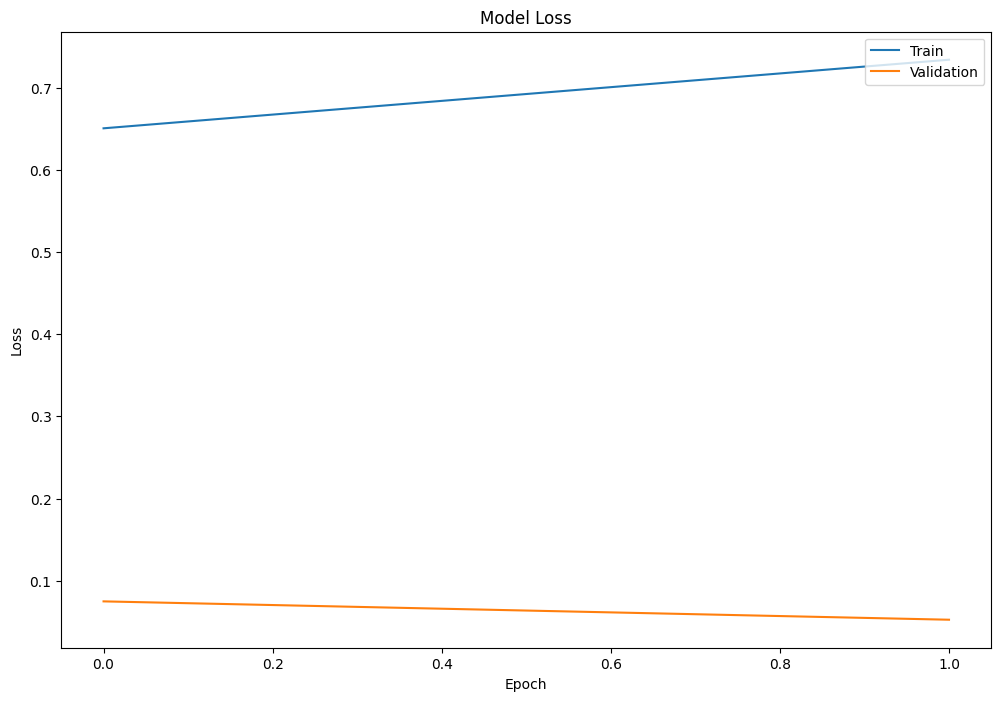

In [54]:
# your code here
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()

### Evaluate the model

1/1 [==============================] - 0s 50ms/step


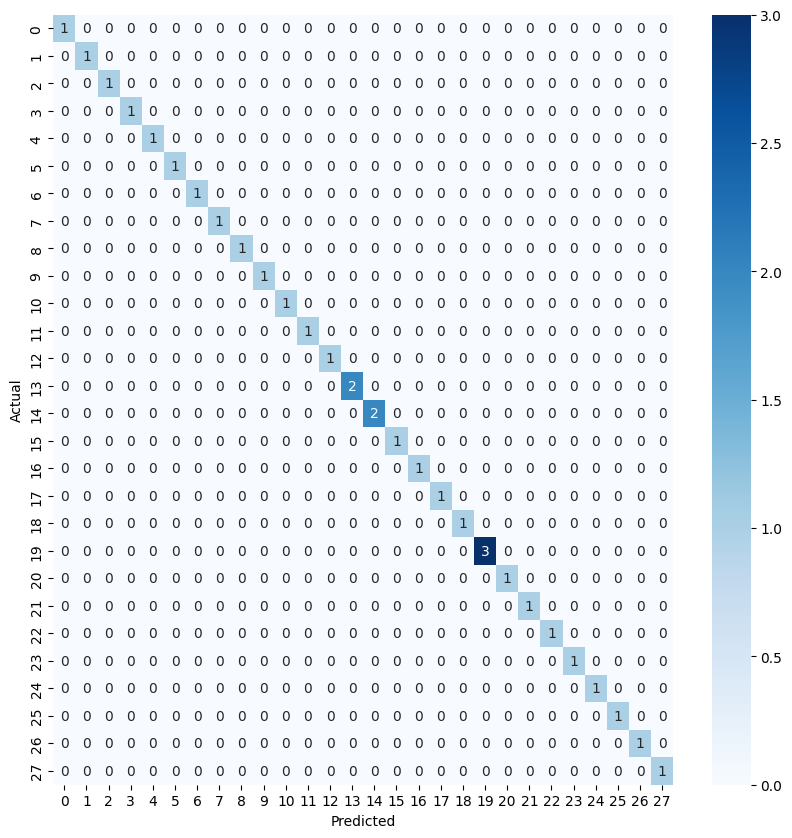

In [55]:
# Get the image and label arrays for the first batch of validation data
x_val_batch, y_val_batch = test_gen.next()

# Use the model to predict the class
predictions = model.predict(x_val_batch)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predicted_classes = np.argmax(predictions, axis=1)

# The actual labels are one-hot encoded, so get the class with the value 1
actual_classes = np.argmax(y_val_batch, axis=1)

# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Save your model

Add code below to save your model's trained weights.

In [56]:
# Code to save your model
model.save_weights('model_weights.h5')
model.save('model.h5')

### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

In [57]:
from keras.models import load_model
# If you want to load the model you need to add 
model = load_model('model.h5')

In [58]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


def load_and_preprocess_image(image_path):
# Load image (In PIL format)
    img = load_img(image_path, target_size=(32, 32)) # change target_size to match your model input
    # Convert image to numpy array
    img_array = img_to_array(img)
    # Normalize image (scale pixel values to the range [0, 1])
    img_array = img_array / 255.0
    # Add an extra dimension (for the batch)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

In [59]:
# File path
file_path = "name of the animals.txt"

# Open the file in read mode
with open(file_path, "r") as file:
    # Read all lines from the file
    lines = file.readlines()

    # Initialize an empty array
    values_array = []

    # Process each line
    for line in lines:
        # Remove leading/trailing whitespaces and split values
        values = line.strip().split()

        # Convert values to desired data type (e.g., integers)
        converted_values = [str(value) for value in values]

        # Append converted values to the array
        values_array.extend(converted_values)

# Print the resulting array
print(values_array)

['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat', 'caterpillar', 'chimpanzee', 'cockroach', 'cow', 'coyote', 'crab', 'crow', 'deer', 'dog', 'dolphin', 'donkey', 'dragonfly', 'duck', 'eagle', 'elephant', 'flamingo', 'fly', 'fox', 'goat', 'goldfish', 'goose', 'gorilla', 'grasshopper', 'hamster', 'hare', 'hedgehog', 'hippopotamus', 'hornbill', 'horse', 'hummingbird', 'hyena', 'jellyfish', 'kangaroo', 'koala', 'ladybugs', 'leopard', 'lion', 'lizard', 'lobster', 'mosquito', 'moth', 'mouse', 'octopus', 'okapi', 'orangutan', 'otter', 'owl', 'ox', 'oyster', 'panda', 'parrot', 'pelecaniformes', 'penguin', 'pig', 'pigeon', 'porcupine', 'possum', 'raccoon', 'rat', 'reindeer', 'rhinoceros', 'sandpiper', 'seahorse', 'seal', 'shark', 'sheep', 'snake', 'sparrow', 'squid', 'squirrel', 'starfish', 'swan', 'tiger', 'turkey', 'turtle', 'whale', 'wolf', 'wombat', 'woodpecker', 'zebra']


1/1 [==============================] - 0s 15ms/step
Overall Prediction is:  [4.14018715e-11 1.34247335e-09 1.33015709e-02 2.34767299e-08
 1.37941664e-04 2.09482884e-08 1.09901873e-03 1.29152244e-08
 1.36830650e-07 5.16438058e-06 3.06291206e-08 3.33039424e-07
 4.98547380e-18 4.00076878e-08 2.28748292e-12 2.98708898e-07
 3.07862129e-15 3.72499002e-15 1.92908143e-08 9.60801751e-13
 4.99356216e-11 3.16322385e-10 3.39668915e-09 7.38349798e-11
 1.37898304e-09 9.87784299e-10 1.73492865e-07 9.78607062e-09
 5.89477800e-09 4.41215661e-07 4.17066971e-11 4.59763304e-12
 7.39347916e-10 2.75582557e-10 3.39411166e-09 5.97113581e-10
 2.53369792e-09 1.58809256e-04 5.04181662e-05 3.26802973e-12
 8.67480843e-09 1.20987149e-08 4.01807837e-10 2.16916249e-10
 4.22274570e-06 1.47163783e-08 2.57270753e-01 1.44011346e-06
 8.24300969e-07 3.26344028e-15 1.97446320e-06 5.63466374e-12
 4.74628294e-03 5.49422008e-10 1.19853451e-06 2.01570092e-05
 1.90023826e-07 9.04233730e-07 6.30793764e-08 1.81724302e-09
 2.409366

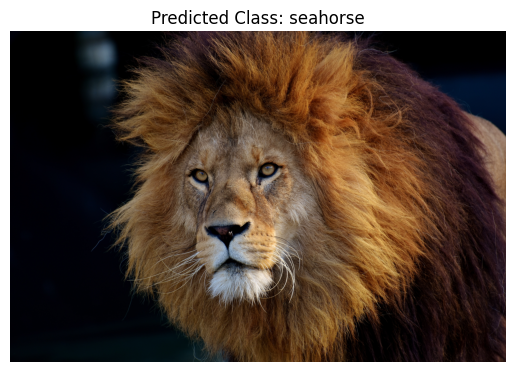

In [61]:
from PIL import Image
labels = values_array
pics_dir = ["lion test image.jpg"]
# Replace 'test.jpg' with the path of the image you want to predict
for animal in pics_dir: 
 img_path = animal 
 img_array = load_and_preprocess_image(img_path)

 # Use the model to predict the class
 predictions = model.predict(img_array)
 predictions = predictions[0]

 # The model returns a probability value for each class
 # The one with the highest probability is the predicted class
 predicted_class = np.argmax(predictions)

 print("Overall Prediction is: ", predictions)
 print("The confidence is:",predictions[predicted_class])
 img = Image.open(img_path)
 plt.imshow(img)
 plt.title(f'Predicted Class: {labels[predicted_class]}')
 plt.axis('off')
 plt.show()


Hopefully, your model predicted all four of the image classes correctly!